In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sb

In [27]:
filepath = r"C:\Users\ksham\Downloads\Regression_dataset_cars.csv"
d = pd.read_csv(filepath,encoding='utf-8')

In [28]:
d

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [29]:
d.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           5
carlength           0
carwidth            3
carheight           3
curbweight          1
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           4
stroke              1
compressionratio    2
horsepower          0
peakrpm             0
citympg             3
highwaympg          2
price               0
dtype: int64

In [30]:
d = d.fillna(0)

In [31]:
d.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
columns_to_drop = ['car_ID', 'CarName']
d.drop(columns_to_drop, axis=1, inplace=True)

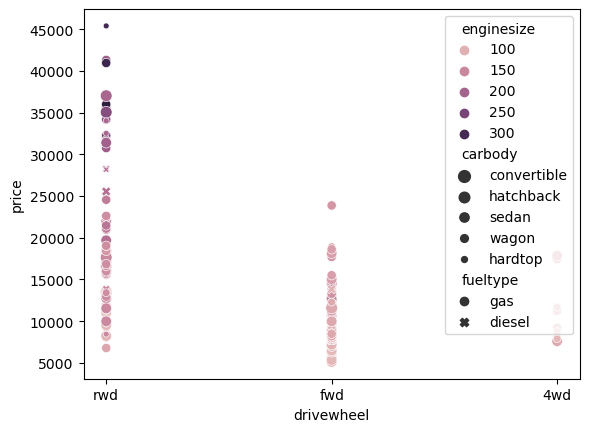

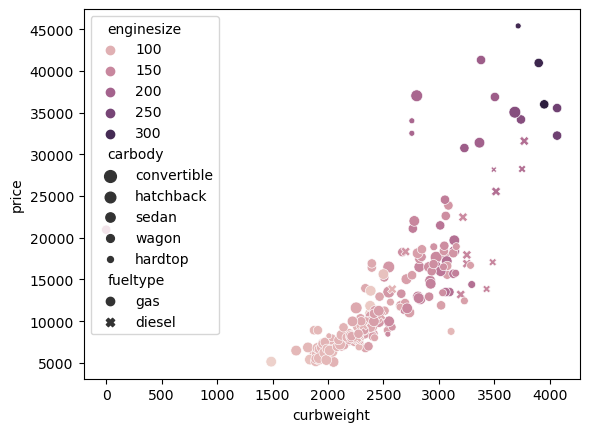

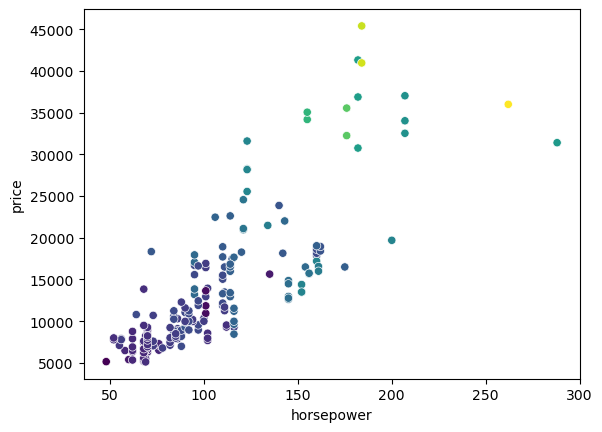

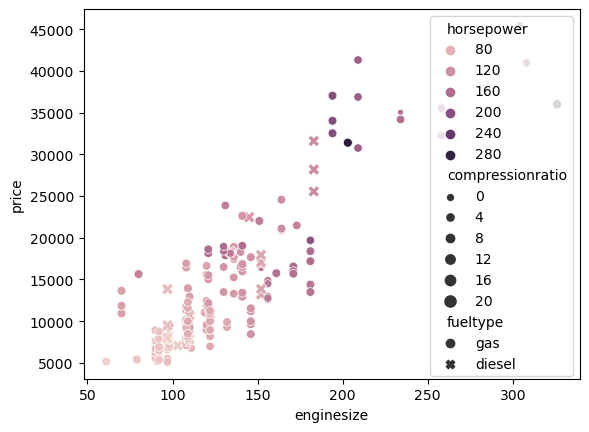

In [33]:
sb.scatterplot(data=d, x='drivewheel', y='price', style='fueltype', hue='enginesize', size='carbody')
plt.show()

sb.scatterplot(data=d, x='curbweight', y='price', style='fueltype', hue=d['enginesize'], size='carbody')
plt.show()

sb.scatterplot(data=d, x='horsepower', y='price', c=d['enginesize'])
plt.show()

sb.scatterplot(data=d, y='price', x='enginesize', hue='horsepower', style='fueltype', size='compressionratio')
plt.show()

Count plots

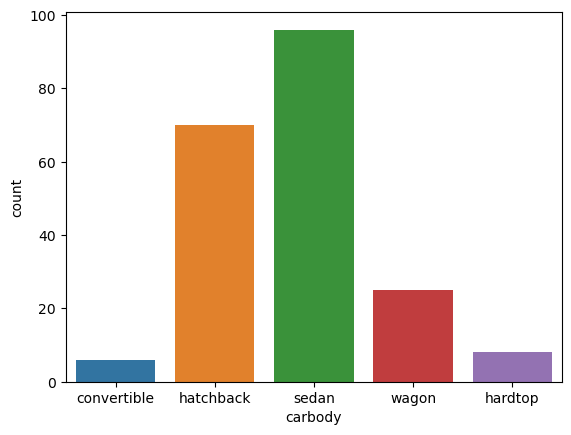

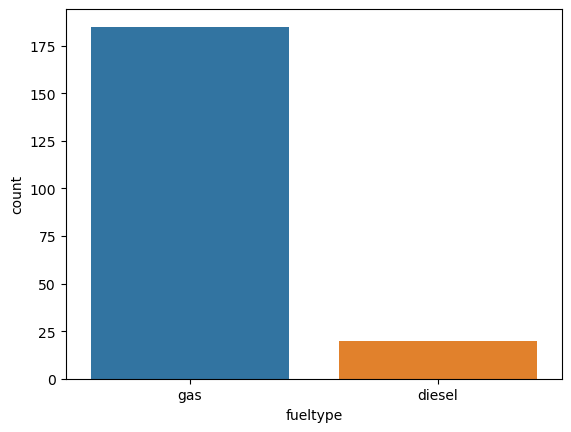

In [35]:
sb.countplot(x=d['carbody'])
plt.show()

sb.countplot(x=d['fueltype'])
plt.show()

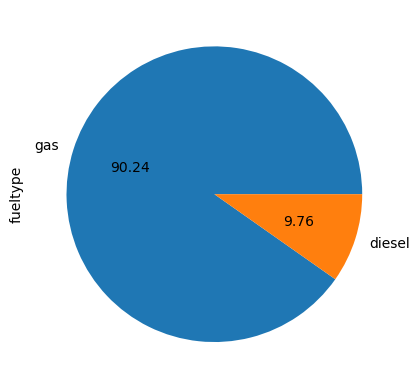

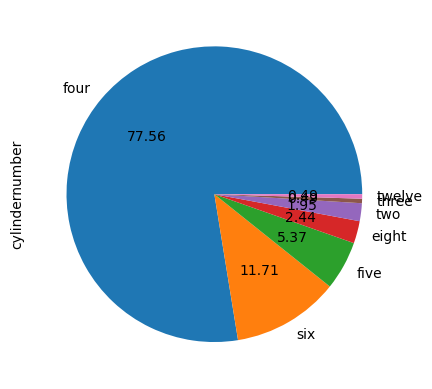

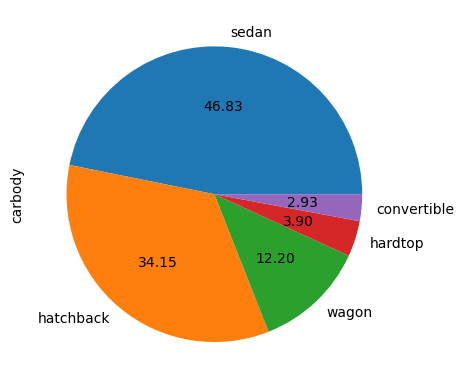

In [36]:
d['fueltype'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

d['cylindernumber'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

d['carbody'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

histograms

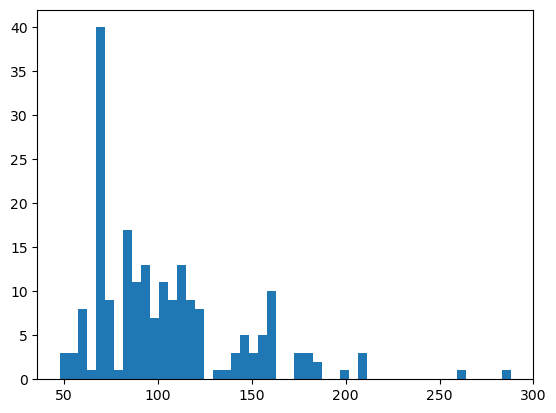

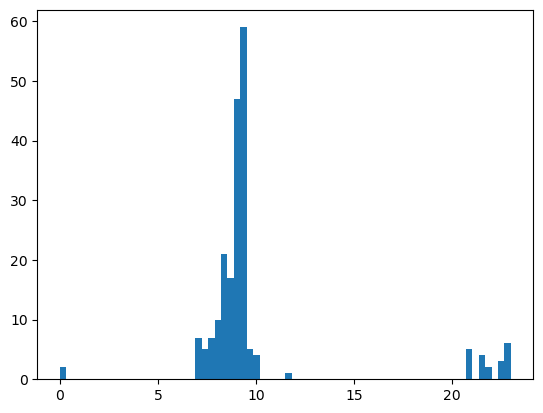

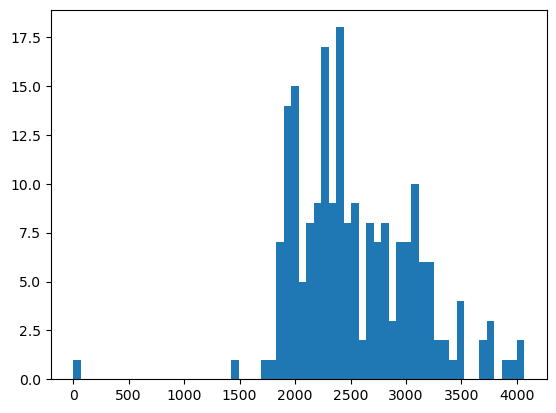

In [37]:
plt.hist(d['horsepower'], bins=50)
plt.show()

plt.hist(d['compressionratio'], bins=70)
plt.show()

plt.hist(d['curbweight'], bins=60)
plt.show()

distribution plot

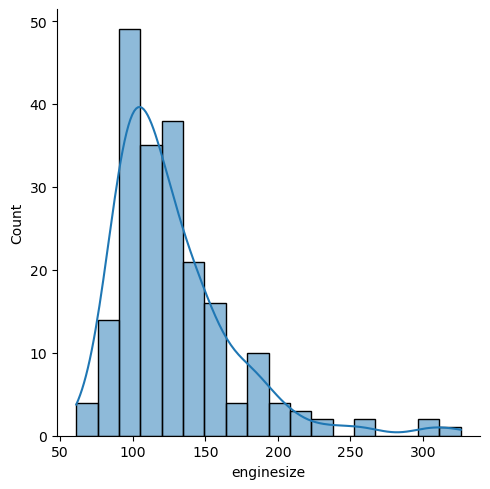

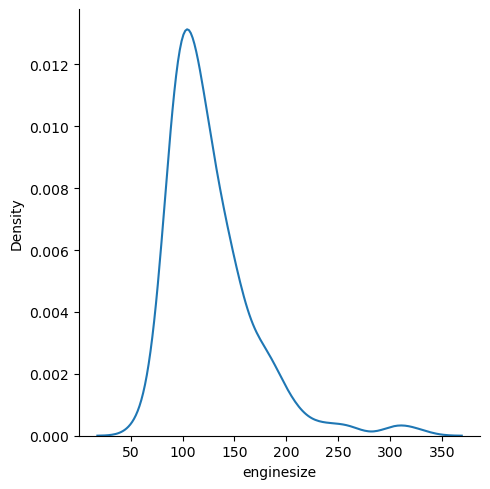

In [38]:
sb.displot(d['enginesize'], kde=True)
plt.show()

sb.displot(d['enginesize'], kind='kde')
plt.show()

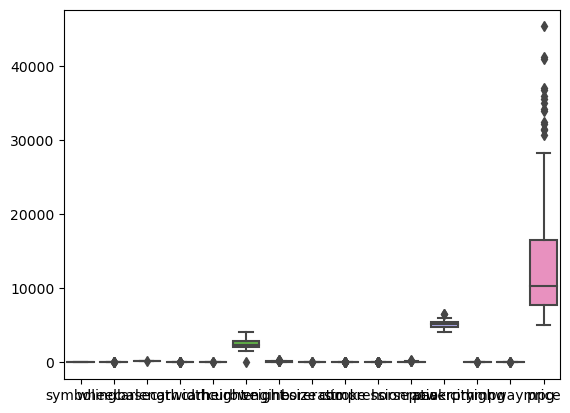

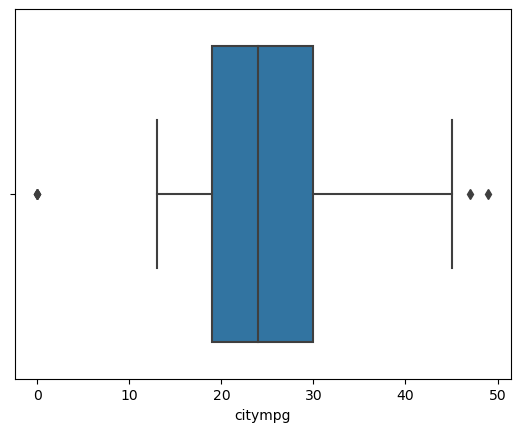

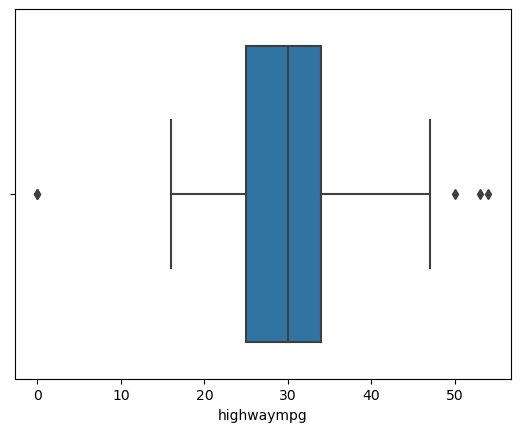

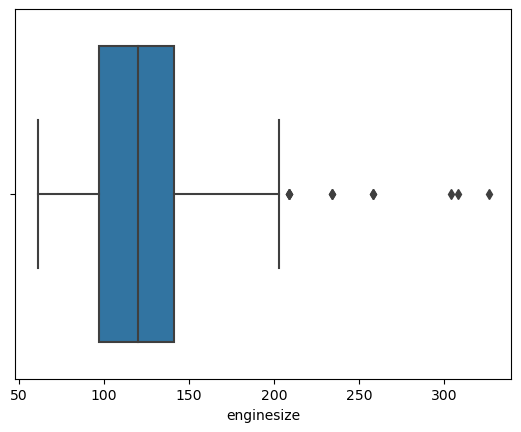

In [39]:
sb.boxplot(data=d)
plt.show()

sb.boxplot(x=d['citympg'])
plt.show()

sb.boxplot(x=d['highwaympg'])
plt.show()

sb.boxplot(x=d['enginesize'])
plt.show()

In [40]:
categorical_columns = ['fueltype', 'carbody', 'aspiration', 'enginetype', 'fuelsystem', 'drivewheel', 'cylindernumber', 'doornumber']
d = pd.get_dummies(d, columns=categorical_columns, drop_first=True)

In [41]:
d.drop(['enginelocation'], inplace=True, axis=1)

In [42]:
X = d.drop('price', axis=1)
y = d['price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 11505377.143978614
Mean Absolute Error: 2545.876908662096
R-squared (R2): 0.8299518785631355


In [48]:
import seaborn as sb

<Axes: >

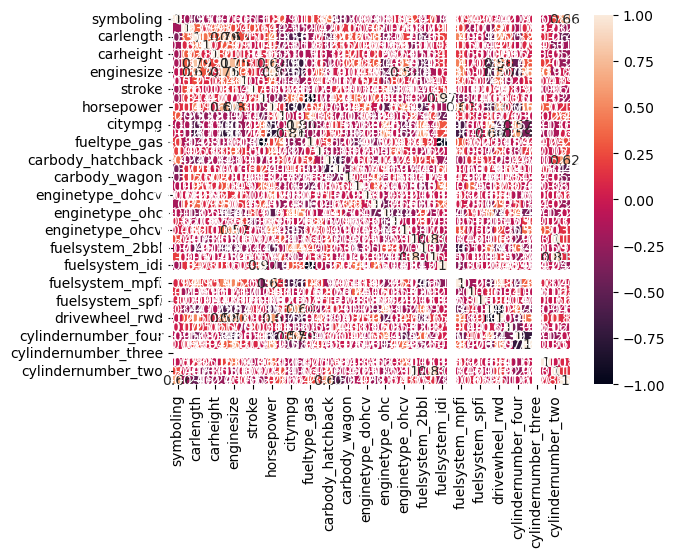

In [49]:
correlation_matrix = X_train.corr()
sb.heatmap(correlation_matrix, annot=True)

In [53]:
print("Simple Linear Regression Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Simple Linear Regression Metrics:
MSE: 11505377.14
MAE: 2545.88
R-squared: 0.83


<Axes: xlabel='citympg', ylabel='price'>

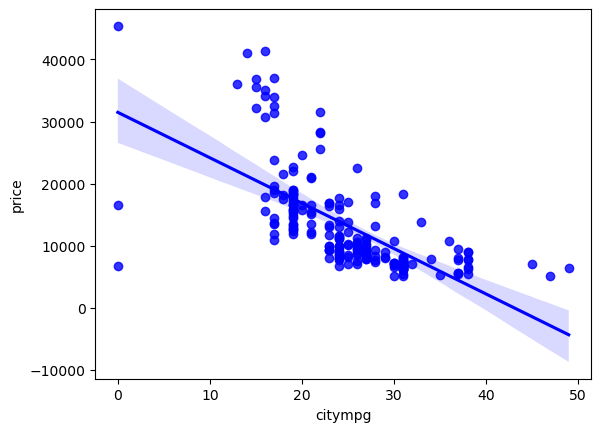

In [62]:
sb.regplot(x='citympg', y='price', data=d, color='blue')

In [64]:
multivariate_regression_model = LinearRegression()
multivariate_regression_model.fit(X_train, y_train)
y_pred_multivariate = multivariate_regression_model.predict(X_test)

In [65]:
mse_multivariate = mean_squared_error(y_test, y_pred_multivariate)
mae_multivariate = mean_absolute_error(y_test, y_pred_multivariate)
r2_multivariate = r2_score(y_test, y_pred_multivariate)

In [66]:
print("\nMultivariate Linear Regression Metrics:")
print(f"MSE: {mse_multivariate:.2f}")
print(f"MAE: {mae_multivariate:.2f}")
print(f"R-squared: {r2_multivariate:.2f}")


Multivariate Linear Regression Metrics:
MSE: 11505377.14
MAE: 2545.88
R-squared: 0.83


bar plots

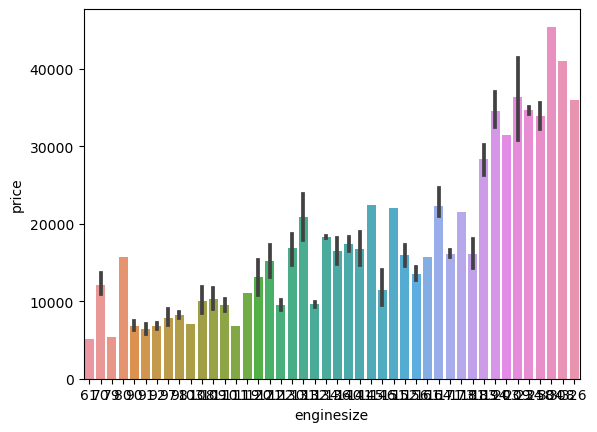

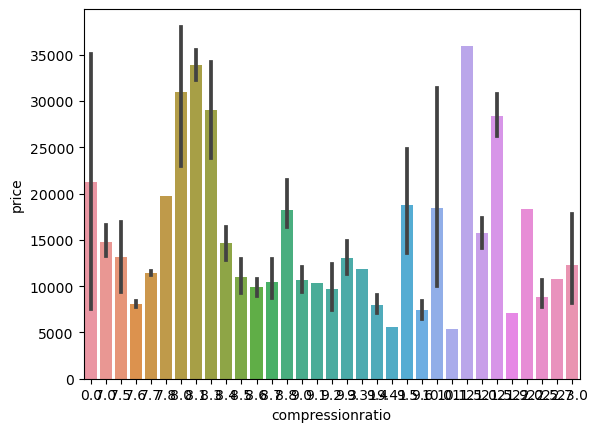

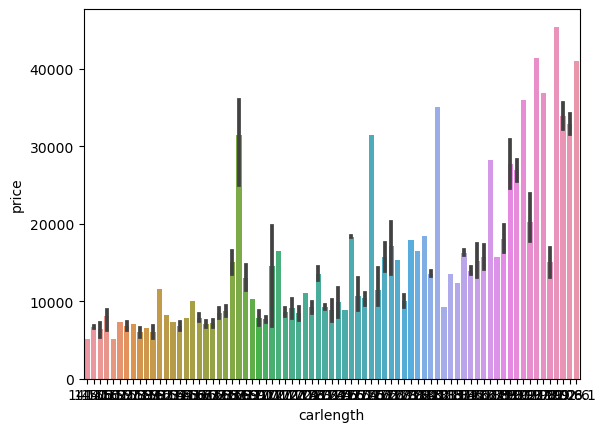

In [69]:
sb.barplot(data=d, y='price', x='enginesize')
plt.show()

##sb.barplot(data=d, y='price', x='fueltype')
##plt.show()

sb.barplot(data=d, y='price', x='compressionratio')
plt.show()

#sb.barplot(data=d, y='price', x='carbody')
#plt.show()

#sb.barplot(data=d, x='drivewheel', y='price')
#plt.show()

sb.barplot(data=d, x='carlength', y='price')
plt.show()


scatter plots